In [62]:
import pandas as pd


In [92]:
teams_df1 = pd.read_csv('delivery1.csv')
matches_df=pd.read_csv('data.csv')

In [93]:
teams_df1['penalty'].unique()

array([nan,  5.])

In [65]:
match_scores = {}

# Loop through each match to calculate scores with extras for team1 and team2
for _, row in teams_df.iterrows():
    match_id = row['match_id']
    team1 = row['batting_team']
    team2 = row['bowling_team']
    
    # Filter data for team1 and team2 for each match
    team1_data = df[(df['match_id'] == match_id) & (df['batting_team'] == team1)]
    team2_data = df[(df['match_id'] == match_id) & (df['batting_team'] == team2)]
    
    # Calculate scores including extras for team1
    team1_score = team1_data['runs_off_bat'].sum()
    team1_extras = team1_data[['wides', 'noballs', 'byes', 'legbyes', 'penalty']].fillna(0).sum().sum()
    team1_total = team1_score + team1_extras
    
    # Calculate scores including extras for team2
    team2_score = team2_data['runs_off_bat'].sum()
    team2_extras = team2_data[['wides', 'noballs', 'byes', 'legbyes', 'penalty']].fillna(0).sum().sum()
    team2_total = team2_score + team2_extras
    
    # Store the total scores in a dictionary
    match_scores[match_id] = {
        team1: {'runs_off_bat': team1_score, 'extras': team1_extras, 'total': team1_total},
        team2: {'runs_off_bat': team2_score, 'extras': team2_extras, 'total': team2_total}
    }

# Display the scores for each team in each match
for match, scores in match_scores.items():
    print(f"Match {match} Scores:")
    for team, details in scores.items():
        print(f"  {team}: {details['runs_off_bat']} runs off bat, {details['extras']} extras, Total: {details['total']} runs")

Match 1 Scores:
  England: 275 runs off bat, 8.0 extras, Total: 283.0 runs
  Afghanistan: 276 runs off bat, 6.0 extras, Total: 282.0 runs
Match 2 Scores:
  South Africa: 196 runs off bat, 9.0 extras, Total: 205.0 runs
  Sri Lanka: 277 runs off bat, 9.0 extras, Total: 286.0 runs
Match 3 Scores:
  Pakistan: 150 runs off bat, 8.0 extras, Total: 158.0 runs
  Netherlands: 148 runs off bat, 8.0 extras, Total: 156.0 runs
Match 4 Scores:
  Bangladesh: 306 runs off bat, 20.0 extras, Total: 326.0 runs
  New Zealand: 405 runs off bat, 23.0 extras, Total: 428.0 runs
Match 5 Scores:
  Australia: 193 runs off bat, 8.0 extras, Total: 201.0 runs
  India: 187 runs off bat, 12.0 extras, Total: 199.0 runs
Match 6 Scores:
  South Africa: 219 runs off bat, 4.0 extras, Total: 223.0 runs
  England: 309 runs off bat, 13.0 extras, Total: 322.0 runs
Match 7 Scores:
  Pakistan: 220 runs off bat, 7.0 extras, Total: 227.0 runs
  Afghanistan: 357 runs off bat, 7.0 extras, Total: 364.0 runs
Match 8 Scores:
  Sri Lan

In [69]:
print("Total runs for Team 1 in Innings 1:", team1_runs)
print("Total runs for Team 2 in Innings 2:", team2_runs)

Total runs for Team 1 in Innings 1: 1418
Total runs for Team 2 in Innings 2: 9487


In [70]:
matches_df.head()

,team1,team2,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,match_type,extras,winner,looser,win_by_runs,win_by_wickets
0,Afghanistan,England,1,Narendra Modi Stadium,Ahmedabad,England,field,JE Root,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,Group,NaN,NaN,NaN,NaN,NaN
1,Sri Lanka,South Africa,2,Rajiv Gandhi International Stadium,Hyderabad,South Africa,field,KIC Asalanka,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Group,NaN,NaN,NaN,NaN,NaN
2,Netherlands,Pakistan,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Pakistan,field,Babar Azam,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Group,NaN,NaN,NaN,NaN,NaN
3,New Zealand,Bangladesh,4,Arun Jaitley Stadium,Delhi,Bangladesh,field,DJ Mitchell,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,Group,NaN,NaN,NaN,NaN,NaN
4,India,Australia,5,MA Chidambaram Stadium,Chennai,India,bat,GJ Maxwell,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,Group,NaN,NaN,NaN,NaN,NaN


In [71]:
for i, row in matches_df.iterrows():
    match_id = row['match_number']
    team1 = row['team1']
    team2 = row['team2']
    
    # Get team scores and extras
    team1_score = match_scores[match_id][team1]['total']
    team2_score = match_scores[match_id][team2]['total']
    team1_extras = match_scores[match_id][team1]['extras']
    team2_extras = match_scores[match_id][team2]['extras']
    
    # Total extras for the match
    matches_df.at[i, 'extras'] = team1_extras + team2_extras
    
    # Determine winner, loser, and the winning margin
    if team1_score > team2_score:
        matches_df.at[i, 'winner'] = team1
        matches_df.at[i, 'looser'] = team2
        matches_df.at[i, 'win_by_runs'] = team1_score - team2_score
        matches_df.at[i, 'win_by_wickets'] = None  # team1 won by runs, so no wickets
    else:
        matches_df.at[i, 'winner'] = team2
        matches_df.at[i, 'looser'] = team1
        matches_df.at[i, 'win_by_runs'] = None  # team2 won by wickets, so no run margin
        matches_df.at[i, 'win_by_wickets'] = 10 - (len(df[(df['match_id'] == match_id) & (df['batting_team'] == team2) & (df['wicket_type'].notnull())]))

# Display the updated matches_df
print(matches_df)


           team1         team2  match_number  \
0    Afghanistan       England             1   
1      Sri Lanka  South Africa             2   
2    Netherlands      Pakistan             3   
3    New Zealand    Bangladesh             4   
4          India     Australia             5   
5        England  South Africa             6   
6    Afghanistan      Pakistan             7   
7     Bangladesh     Sri Lanka             8   
8    Netherlands     Australia             9   
9    New Zealand         India            10   
10      Pakistan       England            11   
11     Sri Lanka     Australia            12   
12   Netherlands   Afghanistan            13   
13    Bangladesh         India            14   
14  South Africa   New Zealand            15   
15       England   Netherlands            16   
16      Pakistan     Australia            17   
17         India     Sri Lanka            18   
18  South Africa    Bangladesh            19   
19   New Zealand   Afghanistan          

C:\Users\HP\AppData\Local\Temp\ipykernel_4032\2329351227.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'England' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  matches_df.at[i, 'winner'] = team2
C:\Users\HP\AppData\Local\Temp\ipykernel_4032\2329351227.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Afghanistan' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  matches_df.at[i, 'looser'] = team1


In [72]:
matches_df.head()

,team1,team2,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,match_type,extras,winner,looser,win_by_runs,win_by_wickets
0,Afghanistan,England,1,Narendra Modi Stadium,Ahmedabad,England,field,JE Root,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,Group,14.0,England,Afghanistan,NaN,9.0
1,Sri Lanka,South Africa,2,Rajiv Gandhi International Stadium,Hyderabad,South Africa,field,KIC Asalanka,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Group,18.0,Sri Lanka,South Africa,81.0,NaN
2,Netherlands,Pakistan,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Pakistan,field,Babar Azam,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Group,16.0,Pakistan,Netherlands,NaN,6.0
3,New Zealand,Bangladesh,4,Arun Jaitley Stadium,Delhi,Bangladesh,field,DJ Mitchell,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,Group,43.0,New Zealand,Bangladesh,102.0,NaN
4,India,Australia,5,MA Chidambaram Stadium,Chennai,India,bat,GJ Maxwell,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,Group,20.0,Australia,India,NaN,6.0


# Question 2 : Toss and Stadium analysis

In [20]:
teams  = set(matches_df['team1']).union(set(matches_df['team2']))
summary_data = {
    'Team': [],
    'Matches Played': [],
    'Toss Won': [],
    'Toss Lost': [],
    'Matches Won after Winning Toss': [],
    'Matches Won after Losing Toss': [],
    '% Matches Chose to Bat First': [],
    '% Matches Chose to Ball First': []
}





In [21]:
for team in teams :
    team_matches = matches_df[(matches_df['team1'] == team) | (matches_df['team2'] == team)]
    total_matches = len(team_matches)
    if total_matches==0:
        continue
    toss_won = team_matches['toss_winner'].value_counts().get(team, 0)
    toss_lost = total_matches - toss_won
    matches_won_after_toss = team_matches[(team_matches['toss_winner'] == team) & (team_matches['winner'] == team)].shape[0]
    
    # Matches won after losing toss
    matches_won_after_losing_toss = team_matches[(team_matches['toss_winner'] != team) & (team_matches['winner'] == team)].shape[0]
    
    # Count decisions
    bat_first = team_matches[team_matches['toss_winner'] == team]['toss_decision'].value_counts().get('bat', 0)
    ball_first = team_matches[team_matches['toss_winner'] == team]['toss_decision'].value_counts().get('field', 0)
    
    # Calculate percentages
    percent_bat_first = (bat_first / total_matches) * 100
    percent_ball_first = (ball_first / total_matches) * 100

    # Populate summary data
    summary_data['Team'].append(team)
    summary_data['Matches Played'].append(total_matches)
    summary_data['Toss Won'].append(toss_won)
    summary_data['Toss Lost'].append(toss_lost)
    summary_data['Matches Won after Winning Toss'].append(matches_won_after_toss)
    summary_data['Matches Won after Losing Toss'].append(matches_won_after_losing_toss)
    summary_data['% Matches Chose to Bat First'].append(percent_bat_first)
    summary_data['% Matches Chose to Ball First'].append(percent_ball_first)
    
summary_df = pd.DataFrame(summary_data)
summary_df

,Team,Matches Played,Toss Won,Toss Lost,Matches Won after Winning Toss,Matches Won after Losing Toss,% Matches Chose to Bat First,% Matches Chose to Ball First
0,Australia,11,5,6,5,5,27.272727,18.181818
1,Sri Lanka,9,4,5,0,3,22.222222,22.222222
2,Bangladesh,9,4,5,0,2,22.222222,22.222222
3,Afghanistan,9,7,2,2,1,33.333333,44.444444
4,Netherlands,9,5,4,1,3,33.333333,22.222222
5,South Africa,9,5,4,1,1,33.333333,22.222222
6,India,11,5,6,3,6,18.181818,27.272727
7,Pakistan,9,5,4,2,0,22.222222,33.333333
8,New Zealand,10,3,7,1,6,20.000000,10.000000
9,England,10,5,5,3,3,0.000000,50.000000


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
toss_wins = matches_df[matches_df['toss_winner'].notnull()]
toss_wins

,team1,team2,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,match_type,extras,winner,looser,win_by_runs,win_by_wickets
0,Afghanistan,England,1,Narendra Modi Stadium,Ahmedabad,England,field,JE Root,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,Group,14.0,England,Afghanistan,NaN,9.0
1,Sri Lanka,South Africa,2,Rajiv Gandhi International Stadium,Hyderabad,South Africa,field,KIC Asalanka,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Group,18.0,Sri Lanka,South Africa,81.0,NaN
2,Netherlands,Pakistan,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Pakistan,field,Babar Azam,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Group,16.0,Pakistan,Netherlands,NaN,6.0
3,New Zealand,Bangladesh,4,Arun Jaitley Stadium,Delhi,Bangladesh,field,DJ Mitchell,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,Group,43.0,New Zealand,Bangladesh,102.0,NaN
4,India,Australia,5,MA Chidambaram Stadium,Chennai,India,bat,GJ Maxwell,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,Group,20.0,Australia,India,NaN,6.0
5,England,South Africa,6,Rajiv Gandhi International Stadium,Hyderabad,South Africa,field,SM Curran,PR Reiffel,RJ Tucker,Nitin Menon,AJ Pycroft,Group,17.0,England,South Africa,99.0,NaN
6,Afghanistan,Pakistan,7,Himachal Pradesh Cricket Association Stadium,Dharamsala,Pakistan,field,Ibrahim Zadran,Ahsan Raza,P Wilson,HDPK Dharmasena,J Srinath,Group,14.0,Afghanistan,Pakistan,137.0,NaN
7,Bangladesh,Sri Lanka,8,Rajiv Gandhi International Stadium,Hyderabad,Bangladesh,bat,S Samarawickrama,AG Wharf,CB Gaffaney,RJ Tucker,AJ Pycroft,Group,40.0,Sri Lanka,Bangladesh,NaN,6.0
8,Netherlands,Australia,9,Arun Jaitley Stadium,Delhi,Netherlands,bat,DA Warner,MA Gough,PR Reiffel,Sharfuddoula,JJ Crowe,Group,30.0,Australia,Netherlands,NaN,8.0
9,New Zealand,India,10,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,India,field,DP Conway,JS Wilson,RK Illingworth,CM Brown,J Srinath,Group,30.0,New Zealand,India,134.0,NaN


In [29]:
decision_summary = toss_wins.groupby(['venue', 'toss_decision']).size().unstack(fill_value=0)
decision_summary


toss_decision,bat,field
venue,,
Arun Jaitley Stadium,2,3
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium,3,2
Eden Gardens,5,0
Himachal Pradesh Cricket Association Stadium,0,5
M Chinnaswamy Stadium,2,3
MA Chidambaram Stadium,3,2
Maharashtra Cricket Association Stadium,2,3
Narendra Modi Stadium,1,4
Rajiv Gandhi International Stadium,1,2


<Axes: xlabel='venue'>

<Figure size 1200x600 with 0 Axes>

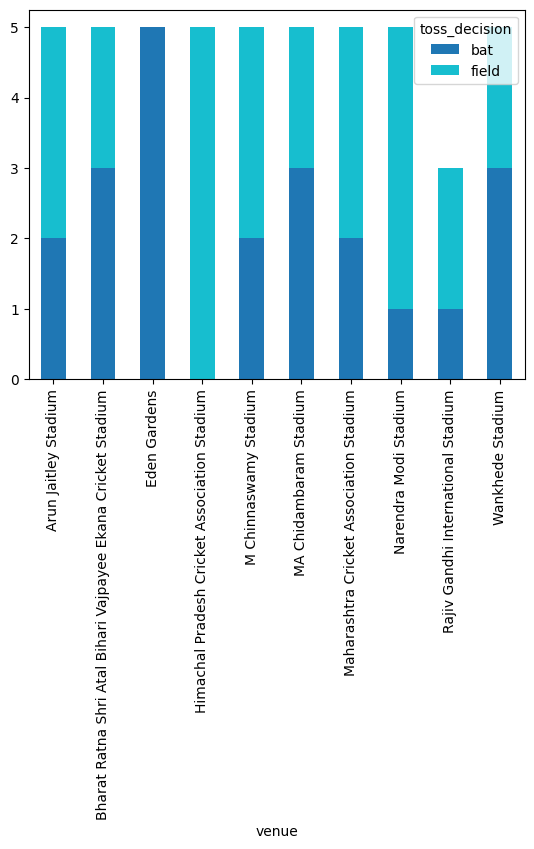

In [30]:
plt.figure(figsize=(12,6))
decision_summary.plot(kind='bar',stacked='True',colormap='tab10')


In [36]:
matches_df.shape


(48, 18)

#  c

In [38]:
total_matches_in_venue = matches_df['venue'].value_counts()
total_matches_in_venue

venue
Narendra Modi Stadium                                           5
Himachal Pradesh Cricket Association Stadium                    5
Arun Jaitley Stadium                                            5
MA Chidambaram Stadium                                          5
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium    5
Maharashtra Cricket Association Stadium                         5
M Chinnaswamy Stadium                                           5
Wankhede Stadium                                                5
Eden Gardens                                                    5
Rajiv Gandhi International Stadium                              3
Name: count, dtype: int64

In [39]:
matches_won_after_toss = matches_df[matches_df['toss_winner']== matches_df['winner']]
matches_won_after_toss_count = matches_won_after_toss['venue'].value_counts()

In [40]:
toss_winning_percentage = (matches_won_after_toss_count / total_matches_in_venue * 100).fillna(0).round(2)

In [41]:
toss_winning_percentage 

venue
Arun Jaitley Stadium                                            40.0
Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium     0.0
Eden Gardens                                                    60.0
Himachal Pradesh Cricket Association Stadium                    40.0
M Chinnaswamy Stadium                                           40.0
MA Chidambaram Stadium                                          20.0
Maharashtra Cricket Association Stadium                         60.0
Narendra Modi Stadium                                           60.0
Rajiv Gandhi International Stadium                               0.0
Wankhede Stadium                                                40.0
Name: count, dtype: float64

# d) Of the instances where the toss winning team chose to bat first, what is the average number of wickets with which the team fielding first won the game?


In [45]:
bat_first_matches = matches_df[(matches_df['toss_decision'] == 'bat')]
fielding_team_wins = bat_first_matches[bat_first_matches['winner'] != bat_first_matches['toss_winner']]
if not fielding_team_wins.empty:
    # Calculate the average number of wickets with which the fielding team won
    average_wickets_won = fielding_team_wins['win_by_wickets'].mean()
    print("Average number of wickets with which the fielding team won:", average_wickets_won)
else:
    print("No instances where the toss-winning team chose to bat and lost.")

Average number of wickets with which the fielding team won: 5.642857142857143


In [46]:
fielding_team_wins

,team1,team2,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,match_type,extras,winner,looser,win_by_runs,win_by_wickets
4,India,Australia,5,MA Chidambaram Stadium,Chennai,India,bat,GJ Maxwell,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,Group,20.0,Australia,India,NaN,6.0
7,Bangladesh,Sri Lanka,8,Rajiv Gandhi International Stadium,Hyderabad,Bangladesh,bat,S Samarawickrama,AG Wharf,CB Gaffaney,RJ Tucker,AJ Pycroft,Group,40.0,Sri Lanka,Bangladesh,NaN,6.0
8,Netherlands,Australia,9,Arun Jaitley Stadium,Delhi,Netherlands,bat,DA Warner,MA Gough,PR Reiffel,Sharfuddoula,JJ Crowe,Group,30.0,Australia,Netherlands,NaN,8.0
13,Bangladesh,India,14,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,Bangladesh,bat,Mohammed Shami,CB Gaffaney,JS Wilson,NaN,RB Richardson,Group,16.0,India,Bangladesh,NaN,5.0
16,Pakistan,Australia,17,Maharashtra Cricket Association Stadium,Pune,Pakistan,bat,SPD Smith,AT Holdstock,RA Kettleborough,M Erasmus,AJ Pycroft,Group,10.0,Australia,Pakistan,NaN,7.0
18,South Africa,Bangladesh,19,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow,South Africa,bat,Nazmul Hossain Shanto,Ahsan Raza,M Erasmus,CB Gaffaney,JJ Crowe,Group,57.0,Bangladesh,South Africa,NaN,5.0
21,Sri Lanka,Netherlands,22,MA Chidambaram Stadium,Chennai,Sri Lanka,bat,MP O'Dowd,PR Reiffel,RJ Tucker,HDPK Dharmasena,RB Richardson,Group,26.0,Netherlands,Sri Lanka,NaN,8.0
24,Afghanistan,Bangladesh,25,M Chinnaswamy Stadium,Bengaluru,Afghanistan,bat,Hasan Mahmud,AT Holdstock,CM Brown,RJ Tucker,J Srinath,Group,10.0,Bangladesh,Afghanistan,NaN,8.0
25,Sri Lanka,New Zealand,26,MA Chidambaram Stadium,Chennai,Sri Lanka,bat,JDS Neesham,AG Wharf,PR Reiffel,RA Kettleborough,RB Richardson,Group,40.0,New Zealand,Sri Lanka,NaN,1.0
30,Pakistan,Sri Lanka,31,Eden Gardens,Kolkata,Pakistan,bat,P Nissanka,Nitin Menon,RA Kettleborough,PR Reiffel,AJ Pycroft,Group,13.0,Sri Lanka,Pakistan,NaN,7.0


#  Question 3

In [59]:
teams = ['India', 'South Africa', 'Australia', 'New Zealand', 'Pakistan', 'Afghanistan','England','Bangladesh','Sri Lanka','Netherlands']

In [76]:
matches_played_by_teams ={}
for team in teams :
    count = matches_df[(matches_df['team1']==team) | (matches_df['team2'] ==team)].shape[0]
    matches_played_by_teams[team] = count
for team, count in matches_played_by_teams.items():
    print(f"Number of matches played by {team}: {count}")

Number of matches played by India: 11
Number of matches played by South Africa: 9
Number of matches played by Australia: 11
Number of matches played by New Zealand: 10
Number of matches played by Pakistan: 9
Number of matches played by Afghanistan: 9
Number of matches played by England: 10
Number of matches played by Bangladesh: 9
Number of matches played by Sri Lanka: 9
Number of matches played by Netherlands: 9


In [78]:
matches_won = matches_df['winner'].value_counts()
matches_won

winner
Australia       10
India            9
New Zealand      7
England          6
Netherlands      4
Sri Lanka        3
Afghanistan      3
Pakistan         2
South Africa     2
Bangladesh       2
Name: count, dtype: int64

In [80]:
matches_loss  = matches_df['looser'].value_counts()
matches_loss

looser
South Africa    7
Bangladesh      7
Pakistan        7
Afghanistan     6
Sri Lanka       6
Netherlands     5
England         4
New Zealand     3
India           2
Australia       1
Name: count, dtype: int64

Handling player dismissed


In [96]:
# Sample data setup for match scores
match_scores = {}

# Assuming `teams_df` and `df` DataFrames are defined
# Loop through each match to calculate scores with extras for team1 and team2
for _, row in teams_df.iterrows():
    match_id = row['match_id']
    team1 = row['batting_team']
    team2 = row['bowling_team']
    
    # Filter data for team1 and team2 for each match
    team1_data = df[(df['match_id'] == match_id) & (df['batting_team'] == team1)]
    team2_data = df[(df['match_id'] == match_id) & (df['batting_team'] == team2)]
    
    # Calculate scores including extras for team1
    team1_score = team1_data['runs_off_bat'].sum()
    team1_extras = team1_data[['wides', 'noballs', 'byes', 'legbyes', 'penalty']].fillna(0).sum().sum()
    team1_total = team1_score + team1_extras
    team1_overs_faced = len(team1_data)  # Assuming 1 row = 1 over faced

    # Calculate scores including extras for team2
    team2_score = team2_data['runs_off_bat'].sum()
    team2_extras = team2_data[['wides', 'noballs', 'byes', 'legbyes', 'penalty']].fillna(0).sum().sum()
    team2_total = team2_score + team2_extras
    team2_overs_bowled = len(team2_data)  # Assuming 1 row = 1 over bowled

    # Store the total scores in a dictionary
    match_scores[match_id] = {
        team1: {'runs_off_bat': team1_score, 'extras': team1_extras, 'total': team1_total, 'overs_faced': team1_overs_faced},
        team2: {'runs_off_bat': team2_score, 'extras': team2_extras, 'total': team2_total, 'overs_faced': team2_overs_bowled}
    }

# Initialize structures for NRR and extras
team_stats = {team: {'matches_played': 0, 'runs_for': 0, 'runs_against': 0, 'overs_for': 0, 'overs_against': 0, 'extras': 0} for team in df['batting_team'].unique()}

# Calculate NRR and Extras for each team
for match, scores in match_scores.items():
    for team, details in scores.items():
        # Update matches played
        team_stats[team]['matches_played'] += 1
        
        # Update runs and overs
        team_stats[team]['runs_for'] += details['total']
        team_stats[team]['overs_for'] += details['overs_faced']
        team_stats[team]['extras'] += details['extras']
        
        # Update runs against and overs faced by opponent
        opponent = [t for t in scores.keys() if t != team][0]
        team_stats[team]['runs_against'] += scores[opponent]['total']
        team_stats[team]['overs_against'] += scores[opponent]['overs_faced']

# Final calculation for NRR and Extras
for team, stats in team_stats.items():
    nrr_for = (stats['runs_for'] / stats['overs_for']) if stats['overs_for'] > 0 else 0
    nrr_against = (stats['runs_against'] / stats['overs_against']) if stats['overs_against'] > 0 else 0
    extras_percentage = (stats['extras'] / stats['runs_for'] * 100) if stats['runs_for'] > 0 else 0

    # Store the calculated values
    team_stats[team]['NRR For'] = nrr_for
    team_stats[team]['NRR Against'] = nrr_against
    team_stats[team]['Extras'] = stats['extras']
    team_stats[team]['% Total Runs Given in Extras'] = extras_percentage

# Display the stats for each team
for team, stats in team_stats.items():
    print(f"{team}: Matches Played: {stats['matches_played']}, Runs For: {stats['runs_for']}, Runs Against: {stats['runs_against']}, NRR For: {stats['NRR For']:.2f}, NRR Against: {stats['NRR Against']:.2f}, Extras: {stats['Extras']}, % Total Runs Given in Extras: {stats['% Total Runs Given in Extras']:.2f}%")


Afghanistan: Matches Played: 9, Runs For: 2245.0, Runs Against: 2291.0, NRR For: 0.96, NRR Against: 0.96, Extras: 110.0, % Total Runs Given in Extras: 4.90%
England: Matches Played: 10, Runs For: 2864.0, Runs Against: 2676.0, NRR For: 1.06, NRR Against: 0.97, Extras: 152.0, % Total Runs Given in Extras: 5.31%
Sri Lanka: Matches Played: 9, Runs For: 2328.0, Runs Against: 2607.0, NRR For: 0.98, NRR Against: 1.02, Extras: 108.0, % Total Runs Given in Extras: 4.64%
South Africa: Matches Played: 9, Runs For: 1862.0, Runs Against: 2549.0, NRR For: 0.78, NRR Against: 0.99, Extras: 134.0, % Total Runs Given in Extras: 7.20%
Netherlands: Matches Played: 9, Runs For: 2095.0, Runs Against: 2176.0, NRR For: 0.85, NRR Against: 0.88, Extras: 105.0, % Total Runs Given in Extras: 5.01%
Pakistan: Matches Played: 9, Runs For: 2053.0, Runs Against: 2431.0, NRR For: 0.82, NRR Against: 1.00, Extras: 109.0, % Total Runs Given in Extras: 5.31%
New Zealand: Matches Played: 10, Runs For: 2897.0, Runs Against: 

# Question 4 PowerPlay

The top 5 batsmen that scored the maximum number of runs during the first powerplay. Include the country that the player is representing along with mentioning the number of matches played & number of runs scored.


In [102]:
teams_df1['ball'] = teams_df1['ball'].astype(str)

In [103]:
teams_df1['overs'] = teams_df1['ball'].apply(lambda x: float(x.split('.')[0]))  # Extract the over number

# Filter for first powerplay (0 to 10 overs)
powerplay_data = teams_df1[(teams_df1['overs'] < 10)]

# Group by batsman, sum runs, and count matches played
batsman_stats = powerplay_data.groupby('striker').agg(
    runs_scored=('runs_off_bat', 'sum'),
    matches_played=('match_id', 'nunique')  # Count unique matches
).reset_index()

# Sort by runs scored and get the top 5
top_batsmen = batsman_stats.nlargest(5, 'runs_scored')

# Display the results
print(top_batsmen[['striker', 'runs_scored', 'matches_played']])

           striker  runs_scored  matches_played
10       DA Warner          401              11
45       RG Sharma          260              11
24     JM Bairstow          218              10
19  Ibrahim Zadran          212               9
8          C Green          201               9


The top 5 bowlers that took the maximum wickets during this phase. Include the country that the player is representing along with mentioning the number of matches played & number of wickets taken.


In [104]:
teams_df1['ball']  = teams_df1['ball'].astype(str)


In [105]:
teams_df1['overs'] = teams_df1['ball'].apply(lambda x: float(x.split('.')[0]))
powerplay_data = teams_df1[teams_df1['overs']<10]
wickets_data = powerplay_data[powerplay_data['wicket_type'].notna()]

In [106]:
bowler_stats = wickets_data.groupby('bowler').agg(
    wickets_taken=('wicket_type', 'count'),       # Count total wickets taken
    matches_played=('match_id', 'nunique'),       # Count unique matches
    bowling_team=('bowling_team', 'first')        # Get the team the bowler is representing
).reset_index()

In [107]:
top_bowlers = bowler_stats.nlargest(5, 'wickets_taken')

In [108]:
print(top_bowlers[['bowler', 'bowling_team', 'wickets_taken', 'matches_played']])

               bowler bowling_team  wickets_taken  matches_played
31         MS Chapman  New Zealand             12               7
1             A Zampa    Australia              9               6
34  Mustafizur Rahman   Bangladesh              9               6
16          JJ Bumrah        India              8               5
17       JR Hazlewood    Australia              7               5


# For the teams that reached the knockout phase, create a line chart with match number on the X-axis and their powerplay score on the Y-axis for all their matches.


In [109]:
knockout_teams = ['India','Australia','England','New Zealand']
teams_df1['ball'] = teams_df1['ball'].astype(str)
teams_df1['overs'] = teams_df1['ball'].apply(lambda x: float(x.split('.')[0]))
powerplay_data = teams_df1[
    (teams_df1['batting_team'].isin(knockout_teams)) & (teams_df1['overs'] < 10)
]


In [110]:
powerplay_scores = powerplay_data.groupby(['match_id', 'batting_team']).agg(
    powerplay_score=('runs_off_bat', 'sum')
).reset_index()

In [111]:
powerplay_scores = powerplay_scores.sort_values(by=['batting_team', 'match_id'])
powerplay_scores

,match_id,batting_team,powerplay_score
2,5,Australia,24
5,9,Australia,87
9,12,Australia,77
13,17,Australia,63
16,21,Australia,63
23,29,Australia,35
26,33,Australia,54
29,37,Australia,81
35,45,Australia,89
36,46,Australia,81


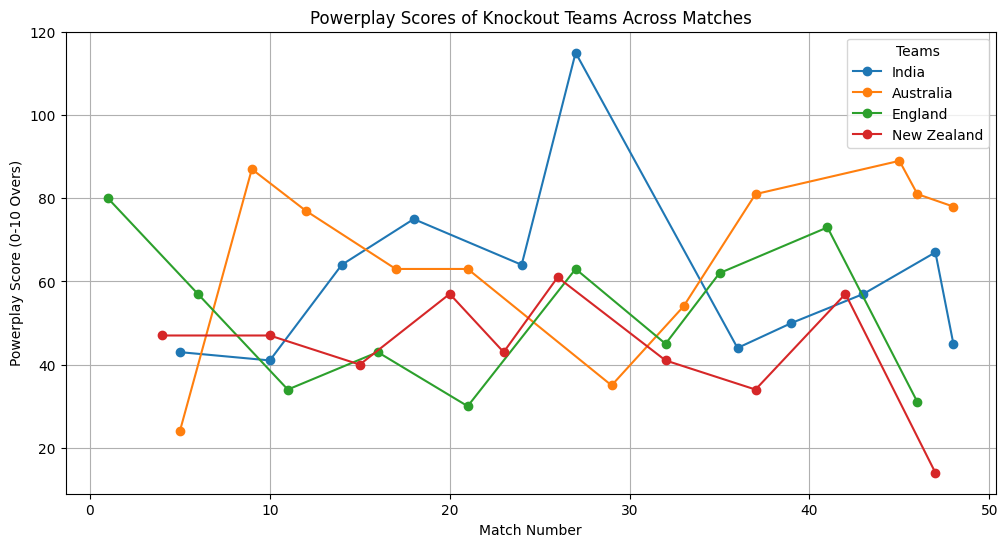

In [112]:
plt.figure(figsize=(12, 6))
for team in knockout_teams:
    team_data = powerplay_scores[powerplay_scores['batting_team'] == team]
    plt.plot(
        team_data['match_id'],
        team_data['powerplay_score'],
        marker='o',
        label=team
    )

# Customizing the plot
plt.xlabel('Match Number')
plt.ylabel('Powerplay Score (0-10 Overs)')
plt.title('Powerplay Scores of Knockout Teams Across Matches')
plt.legend(title="Teams")
plt.grid(True)
plt.show()

# Question 5: Powerplay 3 

In [120]:
teams_df1['ball'] = teams_df1['ball'].astype(str)
teams_df1['overs'] = teams_df1['ball'].apply(lambda x: float(x.split('.')[0]) + (float(x.split('.')[1]) / 6 if '.' in x else 0))

In [121]:
third_powerplay_data = teams_df[(teams_df['overs'] >= 41) & (teams_df['overs'] < 50)]
third_powerplay_data

,match_id,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,overs
248,1,1,40.6,Afghanistan,England,Rahmat Shah,Rashid Khan,JE Root,1,NaN,NaN,NaN,NaN,NaN,NaN,Rahmat Shah,41.000000
249,1,1,41.1,Afghanistan,England,Rahmat Shah,Rashid Khan,JC Buttler,0,NaN,NaN,NaN,NaN,NaN,bowled,Rahmat Shah,41.166667
250,1,1,41.2,Afghanistan,England,Mujeeb Ur Rahman,Rashid Khan,JC Buttler,1,NaN,NaN,NaN,NaN,NaN,NaN,Mujeeb Ur Rahman,41.333333
251,1,1,41.3,Afghanistan,England,Rashid Khan,Mujeeb Ur Rahman,JC Buttler,1,NaN,NaN,NaN,NaN,NaN,NaN,Rashid Khan,41.500000
252,1,1,41.4,Afghanistan,England,Mujeeb Ur Rahman,Rashid Khan,JC Buttler,1,NaN,NaN,NaN,NaN,NaN,NaN,Mujeeb Ur Rahman,41.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26114,45,2,47.1,South Africa,Australia,L Ngidi,H Klaasen,DA Warner,0,NaN,NaN,NaN,NaN,NaN,NaN,L Ngidi,47.166667
26115,45,2,47.2,South Africa,Australia,L Ngidi,H Klaasen,DA Warner,1,NaN,NaN,NaN,NaN,NaN,NaN,L Ngidi,47.333333
26116,45,2,47.3,South Africa,Australia,H Klaasen,L Ngidi,DA Warner,0,NaN,NaN,NaN,NaN,NaN,NaN,H Klaasen,47.500000
26117,45,2,47.4,South Africa,Australia,H Klaasen,L Ngidi,DA Warner,6,NaN,NaN,NaN,NaN,NaN,NaN,H Klaasen,47.666667


In [122]:
third_powerplay_summary = third_powerplay_data.groupby('batting_team').agg(
    total_runs=('runs_off_bat', 'sum'),  # Sum of runs off the bat
    wides=('wides', 'sum'),  # Sum of wides
    noballs=('noballs', 'sum'),  # Sum of no-balls
    byes=('byes', 'sum'),  # Sum of byes
    legbyes=('legbyes', 'sum'),  # Sum of leg-byes
    penalty=('penalty', 'sum'),  # Sum of penalty runs
    balls_faced=('ball', 'count')  # Count of balls faced
).reset_index()


In [123]:
third_powerplay_summary['extras'] = (
    third_powerplay_summary['wides'] +
    third_powerplay_summary['noballs'] +
    third_powerplay_summary['byes'] +
    third_powerplay_summary['legbyes'] +
    third_powerplay_summary['penalty']
)

In [124]:
third_powerplay_summary['overs_faced'] = third_powerplay_summary['balls_faced'] / 6

In [125]:
third_powerplay_summary['run_rate'] = (third_powerplay_summary['total_runs'] + third_powerplay_summary['extras']) / third_powerplay_summary['overs_faced']

In [126]:
summary_table = third_powerplay_summary[['batting_team', 'total_runs', 'extras', 'overs_faced', 'run_rate']]
summary_table.columns = ['Team', 'Total Runs', 'Extras', 'Overs Faced', 'Run Rate']
print(summary_table)

           Team  Total Runs  Extras  Overs Faced  Run Rate
0   Afghanistan         349    24.0    45.166667  8.258303
1     Australia         492    31.0    65.833333  7.944304
2    Bangladesh         230    13.0    47.666667  5.097902
3       England         433    18.0    56.833333  7.935484
4         India         468    26.0    65.166667  7.580563
5   Netherlands         365    14.0    51.000000  7.431373
6   New Zealand         677    39.0    73.333333  9.763636
7      Pakistan         242    22.0    48.500000  5.443299
8  South Africa         242    29.0    41.333333  6.556452
9     Sri Lanka         294    22.0    42.500000  7.435294


b) How does this change when the teams are batting first and when they are batting second


In [128]:
teams_df1['ball'] = teams_df1['ball'].astype(str)
teams_df1['overs'] = teams_df1['ball'].apply(lambda x: float(x.split('.')[0]) + (float(x.split('.')[1]) / 6 if '.' in x else 0))

In [129]:
third_powerplay_data = teams_df[(teams_df1['overs'] >= 41) & (teams_df1['overs'] < 50)]


In [130]:
third_powerplay_summary = third_powerplay_data.groupby(['batting_team', 'innings']).agg(
    total_runs=('runs_off_bat', 'sum'),  # Sum of runs off the bat
    wides=('wides', 'sum'),  # Sum of wides
    noballs=('noballs', 'sum'),  # Sum of no-balls
    byes=('byes', 'sum'),  # Sum of byes
    legbyes=('legbyes', 'sum'),  # Sum of leg-byes
    penalty=('penalty', 'sum'),  # Sum of penalty runs
    balls_faced=('ball', 'count')  # Count of balls faced
).reset_index()

# Calculate extras as the sum of all extra types
third_powerplay_summary['extras'] = (
    third_powerplay_summary['wides'] +
    third_powerplay_summary['noballs'] +
    third_powerplay_summary['byes'] +
    third_powerplay_summary['legbyes'] +
    third_powerplay_summary['penalty']
)

# Calculate total overs faced as balls faced / 6
third_powerplay_summary['overs_faced'] = third_powerplay_summary['balls_faced'] / 6

# Calculate aggregate run rate: (total_runs + extras) / overs_faced
third_powerplay_summary['run_rate'] = (third_powerplay_summary['total_runs'] + third_powerplay_summary['extras']) / third_powerplay_summary['overs_faced']

# Add labels to indicate if the team batted first or second
third_powerplay_summary['batting_position'] = third_powerplay_summary['innings'].map({1: 'Batting First', 2: 'Batting Second'})

# Display the table with batting position
summary_table = third_powerplay_summary[['batting_team', 'batting_position', 'total_runs', 'extras', 'overs_faced', 'run_rate']]
summary_table.columns = ['Team', 'Batting Position', 'Total Runs', 'Extras', 'Overs Faced', 'Run Rate']
print(summary_table)

            Team Batting Position  Total Runs  Extras  Overs Faced   Run Rate
0    Afghanistan    Batting First         296    20.0    37.500000   8.426667
1    Afghanistan   Batting Second          53     4.0     7.666667   7.434783
2      Australia    Batting First         435    29.0    57.000000   8.140351
3      Australia   Batting Second          57     2.0     8.833333   6.679245
4     Bangladesh    Batting First         167    11.0    35.833333   4.967442
5     Bangladesh   Batting Second          63     2.0    11.833333   5.492958
6        England    Batting First         285     9.0    36.833333   7.981900
7        England   Batting Second         148     9.0    20.000000   7.850000
8          India    Batting First         347    22.0    46.000000   8.021739
9          India   Batting Second         121     4.0    19.166667   6.521739
10   Netherlands    Batting First         267    10.0    37.500000   7.386667
11   Netherlands   Batting Second          98     4.0    13.5000

c-)The number of wickets taken by the teams in the last powerplay. What is the average number of deliveries in which teams were able to take a wicket in this phase. Create a table to showcase these observations.


In [131]:
teams_df1['ball'] = teams_df1['ball'].astype(str)
teams_df1['overs'] = teams_df1['ball'].apply(lambda x: float(x.split('.')[0]) + (float(x.split('.')[1]) / 6 if '.' in x else 0))

In [132]:
last_powerplay_data = teams_df1[(teams_df1['overs'] >= 41) & (teams_df1['overs'] <= 50)]

In [133]:
last_powerplay_wickets = last_powerplay_data[last_powerplay_data['wicket_type'].notna()].groupby('bowling_team').size().reset_index(name='wickets_taken')

# Count total balls bowled by each team in this phase
last_powerplay_balls = last_powerplay_data.groupby('bowling_team').size().reset_index(name='balls_bowled')

# Merge the data to calculate average deliveries per wicket
powerplay_wicket_stats = pd.merge(last_powerplay_wickets, last_powerplay_balls, on='bowling_team', how='outer').fillna(0)

# Calculate average deliveries per wicket (balls_bowled / wickets_taken)
powerplay_wicket_stats['avg_balls_per_wicket'] = powerplay_wicket_stats.apply(
    lambda row: row['balls_bowled'] / row['wickets_taken'] if row['wickets_taken'] > 0 else float('inf'), axis=1
)

# Display the final table
powerplay_wicket_stats.columns = ['Team', 'Wickets Taken', 'Balls Bowled', 'Avg Balls per Wicket']
print(powerplay_wicket_stats)

           Team  Wickets Taken  Balls Bowled  Avg Balls per Wicket
0   Afghanistan             15           288             19.200000
1     Australia             28           343             12.250000
2    Bangladesh             11           258             23.454545
3       England             20           397             19.850000
4         India             30           437             14.566667
5   Netherlands             10           287             28.700000
6   New Zealand             13           280             21.538462
7      Pakistan             17           262             15.411765
8  South Africa             18           353             19.611111
9     Sri Lanka             26           350             13.461538


# Question -6

ENGLAND NRR = (Total Runs Scored(317))/over faced -6.32

Estimated over = 317/7.477 =42.4(nearly)

Filling null value of reserve umpire


In [141]:
matches_df['reserve_umpire'] = matches_df['reserve_umpire'].fillna('CB Gaffaney ')
matches_df['reserve_umpire'].isnull().sum()

0